In [1]:
from __init__ import *

In [2]:
dataframes = []

for data_dict in SETTING["model_data_dicts"]:

    print("=" * 8, data_dict["name"], "=" * 8)

    dataframe = pd.read_csv(data_dict["file_path"], sep="\t", index_col=0)

    dataframe.columns.name = data_dict["axis_1_name"]

    kraft.feature_x_sample.summarize(dataframe, plot=False)

    dataframes.append(dataframe)

======== GSE128078 Transcription ========
(21633, 99)
Good min: 0.00e+00
Good median: 6.96e-02
Good mean: 1.30e+01
Good max: 4.96e+05


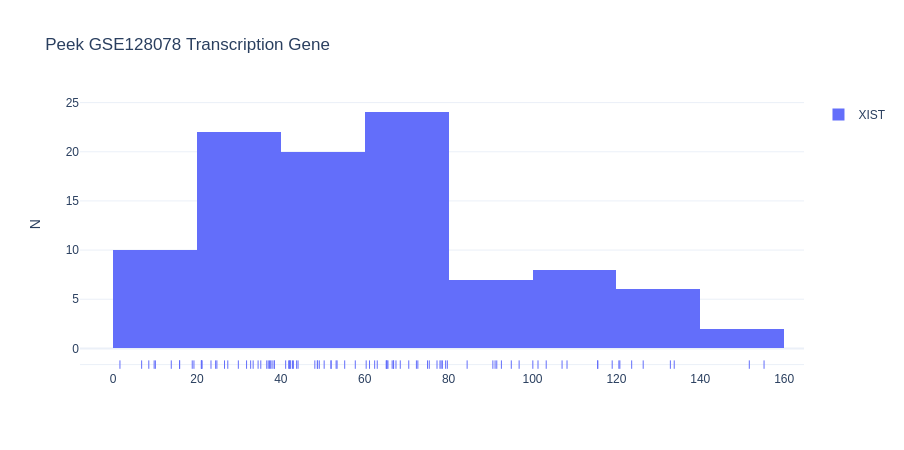

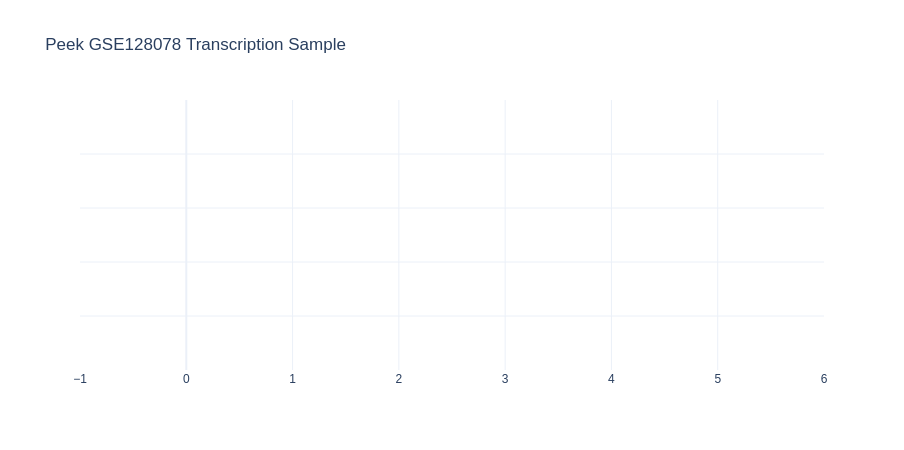

In [8]:
for data_dict_i, data_dict in enumerate(SETTING["model_data_dicts"]):

    dataframe = dataframes[data_dict_i]

    for axis in (0, 1):

        elements_to_peek = SETTING["axis_{}_elements_to_peek".format(axis)]

        if axis == 0:

            element_valuess = tuple(
                dataframe.loc[element, :] for element in dataframe.index & elements_to_peek
            )
            
            name = dataframe.index.name

        else:

            element_valuess = tuple(
                dataframe.loc[:, element] for element in dataframe.columns & elements_to_peek
            )
            
            name = dataframe.columns.name

        kraft.plot.plot_histogram(
            element_valuess, layout={"title": {"text": "Peek {} {}".format(data_dict["name"], name)}}
        )